# Operation 'FTM' (follow the money)
- RQ: Where is the most dispoable income?

In [25]:
import pandas as pd
import sys
import os

import inspect
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [3]:
df=pd.read_csv('RPOP_03022020185720198.csv')

In [4]:
df.head()

,COUNTRY,Country,DAGEGR,Age groups,DSEX,Gender,DSTATUS,Status of population,YEAR,Year,Value,Flag Codes,Flags
0,AUS,Australia,1010,10 years,1,Males,90,All population,2002,2002,141066.0,NaN,NaN
1,AUS,Australia,1010,10 years,1,Males,90,All population,2003,2003,141142.0,NaN,NaN
2,AUS,Australia,1010,10 years,1,Males,90,All population,2004,2004,141650.0,NaN,NaN
3,AUS,Australia,1010,10 years,1,Males,90,All population,2005,2005,141954.0,NaN,NaN
4,AUS,Australia,1010,10 years,1,Males,90,All population,2006,2006,139860.0,NaN,NaN


# cleaning

In [5]:
def data_check(df):
    nulls=df.isna().sum()
    nulls=nulls.reset_index().join((nulls/len(df)).reset_index(),lsuffix='_abs', rsuffix='_pct')
    nulls=nulls.drop('index_pct',axis=1)
    nulls.rename(columns={'index_abs':'columns','0_abs':'null_count','0_pct':'null_pct'},inplace=True)
    nulls.set_index('columns',inplace=True)

    cardinality=df.nunique().reset_index().join(((df.nunique()/len(df))*100).reset_index(),lsuffix='_abs', rsuffix='_pct')
    cardinality=cardinality.drop('index_pct',axis=1)
    cardinality.rename(columns={'index_abs':'columns','0_abs':'unique_value_count','0_pct':'unique_value_pct'},inplace=True)
    cardinality.set_index('columns',inplace=True)
    
    results = nulls.join(cardinality)
    return result

In [6]:
data_check(df)

,null_count,null_pct,unique_value_count,unique_value_pct
columns,,,,
COUNTRY,0,0.000000,56,0.166716
Country,0,0.000000,56,0.166716
DAGEGR,0,0.000000,38,0.113129
Age groups,0,0.000000,38,0.113129
DSEX,0,0.000000,2,0.005954
Gender,0,0.000000,2,0.005954
DSTATUS,0,0.000000,1,0.002977
Status of population,0,0.000000,1,0.002977
YEAR,0,0.000000,11,0.032748


In [18]:
country_totals=df.pivot_table(index='Year',columns='Country', values='Value')
country_totals.head()

Country,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China (People's Republic of),Colombia,Czech Republic,...,Sri Lanka,Sweden,Switzerland,Thailand,Tunisia,Turkey,United Kingdom,United States,Uruguay,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2002,1.164496e+06,606066.039474,246215.157895,312606.328947,5.643413e+06,NaN,497694.892105,4.109486e+07,NaN,317320.697368,...,0.0,271031.289474,219520.342105,2.039332e+06,318426.184211,NaN,1.796042e+06,8.580843e+06,105935.842105,446873.118421
2003,1.164496e+06,612530.355263,244115.894737,313775.934211,5.615148e+06,963002.328947,503023.671053,4.109486e+07,NaN,314356.065789,...,0.0,271697.105263,220992.934211,2.026388e+06,318972.368421,2.284742e+06,1.806330e+06,8.925472e+06,106627.144737,446873.118421
2004,NaN,618678.434211,246272.065789,314828.539474,5.783550e+06,963363.578947,500778.505789,NaN,NaN,313605.763158,...,NaN,272456.736842,222398.276316,NaN,NaN,2.299441e+06,1.819386e+06,8.986370e+06,NaN,NaN
2005,NaN,625861.144737,248136.526316,316163.328947,5.922060e+06,980733.802632,513514.421053,NaN,NaN,312631.447368,...,NaN,273204.407895,223800.842105,NaN,NaN,2.325026e+06,1.830205e+06,9.091868e+06,NaN,NaN
2006,NaN,633841.421053,249786.842105,318105.723684,5.967939e+06,989241.171053,521727.973684,NaN,NaN,312366.289474,...,NaN,274074.263158,224972.078947,NaN,NaN,2.349651e+06,1.840719e+06,9.176708e+06,NaN,NaN


In [24]:
data_check(country_totals)

KeyError: "['index_pct'] not found in axis"

In [23]:
country_totals.pct_change()

Country,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China (People's Republic of),Colombia,Czech Republic,...,Sri Lanka,Sweden,Switzerland,Thailand,Tunisia,Turkey,United Kingdom,United States,Uruguay,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,0.000000,0.010666,-0.008526,0.003741,-0.005008,NaN,0.010707,-3.634723e-09,NaN,-0.009343,...,NaN,0.002457,0.006708,-0.006347,0.001715,NaN,0.005728,0.040163,0.006526,0.0
2004,0.000000,0.010037,0.008833,0.003355,0.029991,0.000375,-0.004463,0.000000e+00,NaN,-0.002387,...,NaN,0.002796,0.006359,0.000000,0.000000,0.006433,0.007228,0.006823,0.000000,0.0
2005,0.000000,0.011610,0.007571,0.004240,0.023949,0.018031,0.025432,0.000000e+00,NaN,-0.003107,...,NaN,0.002744,0.006307,0.000000,0.000000,0.011127,0.005946,0.011740,0.000000,0.0
2006,0.000000,0.012751,0.006651,0.006144,0.007747,0.008674,0.015995,0.000000e+00,NaN,-0.000848,...,NaN,0.003184,0.005233,0.000000,0.000000,0.010591,0.005745,0.009331,0.000000,0.0
2007,0.000000,0.020323,0.003169,0.006597,0.023981,0.009611,0.017339,0.000000e+00,NaN,-0.000164,...,NaN,0.006861,0.005900,0.000000,0.000000,0.000000,0.006092,0.009478,0.000000,0.0
2008,0.000000,0.019895,0.003480,0.007271,0.000091,0.007182,0.008522,0.000000e+00,NaN,0.005953,...,NaN,0.007569,0.010834,0.000000,0.000000,-0.031595,0.006459,0.013934,0.000000,0.0
2009,0.000000,0.020788,0.002083,0.007620,0.004396,0.011054,0.000000,0.000000e+00,NaN,0.005194,...,NaN,0.008114,0.013776,0.000000,0.000000,0.010719,0.006403,0.001904,0.000000,0.0
2010,0.104880,0.021485,0.001664,0.007575,-0.003293,0.001107,0.008450,2.077818e-02,NaN,0.000743,...,NaN,0.009181,0.010159,0.000000,0.000000,0.011816,0.006530,0.008003,0.000000,0.0


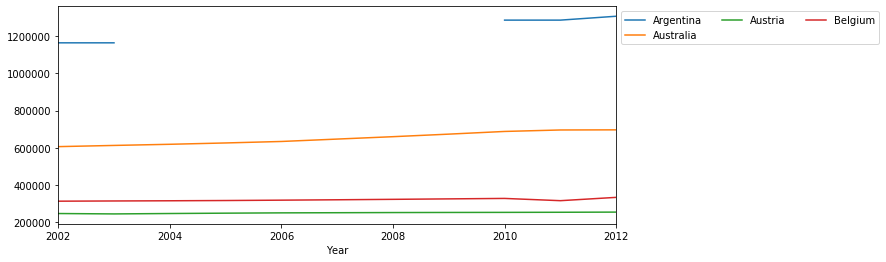

In [21]:
ax=country_totals.iloc[:,:4].plot(figsize=(10,4))
plt.legend(ncol=3, bbox_to_anchor=(1,1))

In [84]:
country_totals.transpose()['Belgium']

Year
2002    312606.328947
2003    313775.934211
2004    314828.539474
2005    316163.328947
2006    318105.723684
2007    320204.421053
2008    322532.657895
2009    324990.407895
2010    327452.223684
2011    315319.894737
2012    333155.368421
Name: Belgium, dtype: float64